In [1]:
%matplotlib notebook

C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import paramonte as pm
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [3]:
dfz = pd.read_csv("z.csv")

In [4]:
dfz.head()

,1.769
0,1.51060
1,0.16401
2,-0.28276
3,1.15220
4,-1.14650


<IPython.core.display.Javascript object>


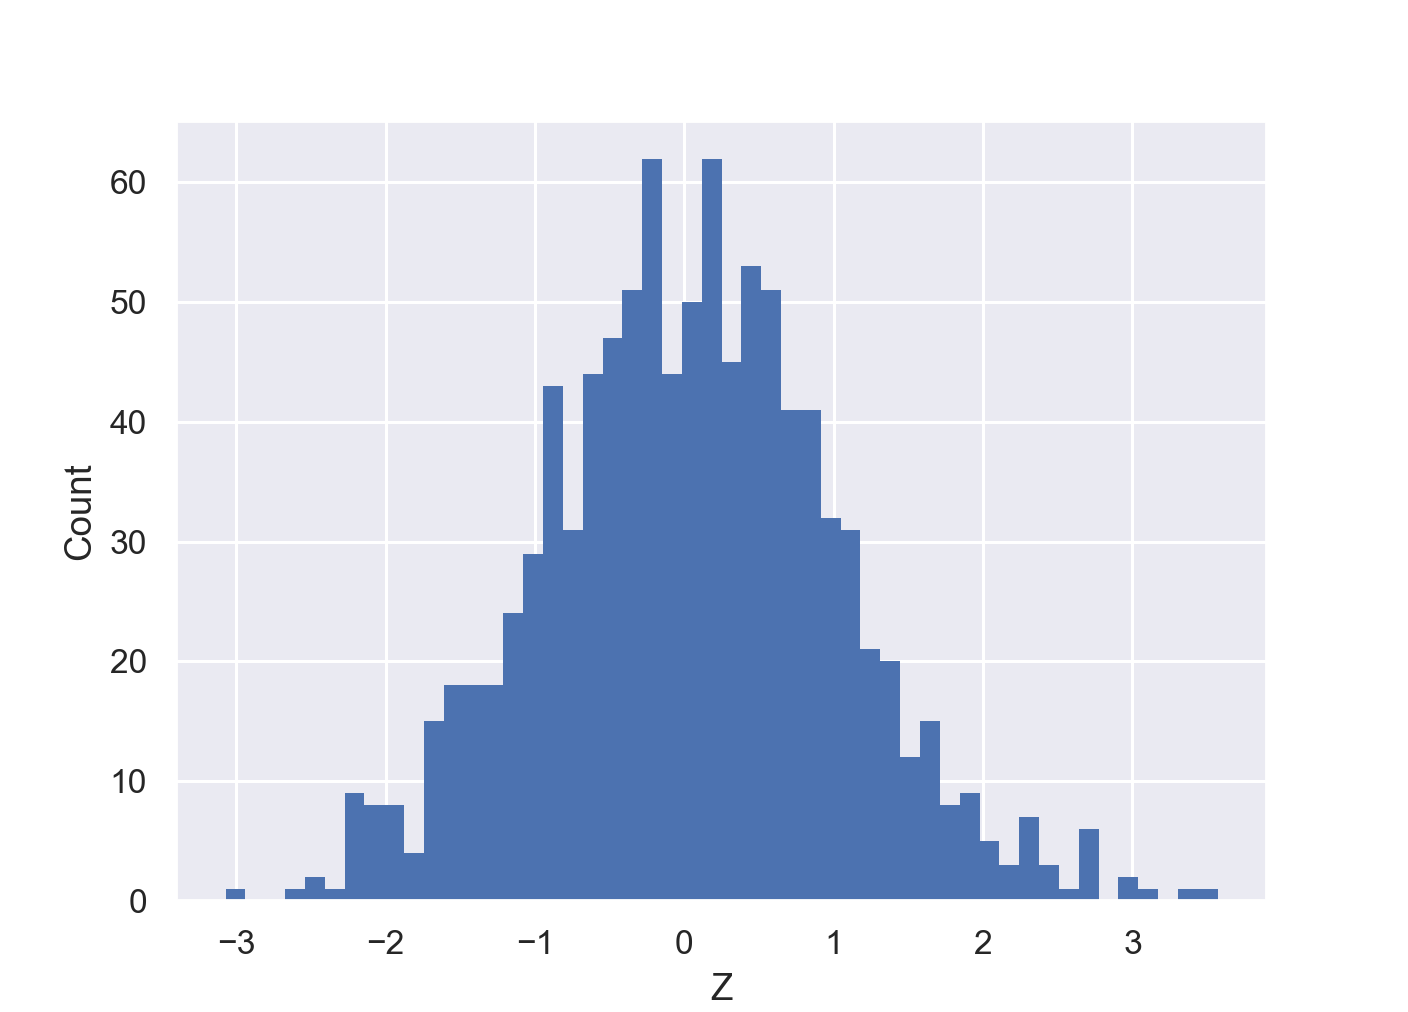

In [5]:
# plot histogram of data.

fig = plt.figure(figsize = (6.4,4.6), dpi = 200)
ax = fig.gca()
ax.hist ( dfz.iloc[:,0]
        , bins = 50
        , range = (np.min(dfz.iloc[:,0]), np.max(dfz.iloc[:,0]))
        , histtype = "stepfilled"
        , linewidth = 0
        , rwidth = 0
        )
ax.set_xlabel("Z")
ax.set_ylabel("Count")
plt.show()
plt.savefig("z.png")

In [6]:
dfxy = pd.read_csv("xy.csv")
dfxy

,x,y
0,4.85380,9.6227
1,8.00280,12.5130
2,1.41890,4.5829
3,4.21760,6.9348
4,9.15740,13.3100
...,...,...
995,0.25135,2.6935
996,4.21110,7.1046
997,1.84100,4.6258
998,7.25780,10.7310


<IPython.core.display.Javascript object>


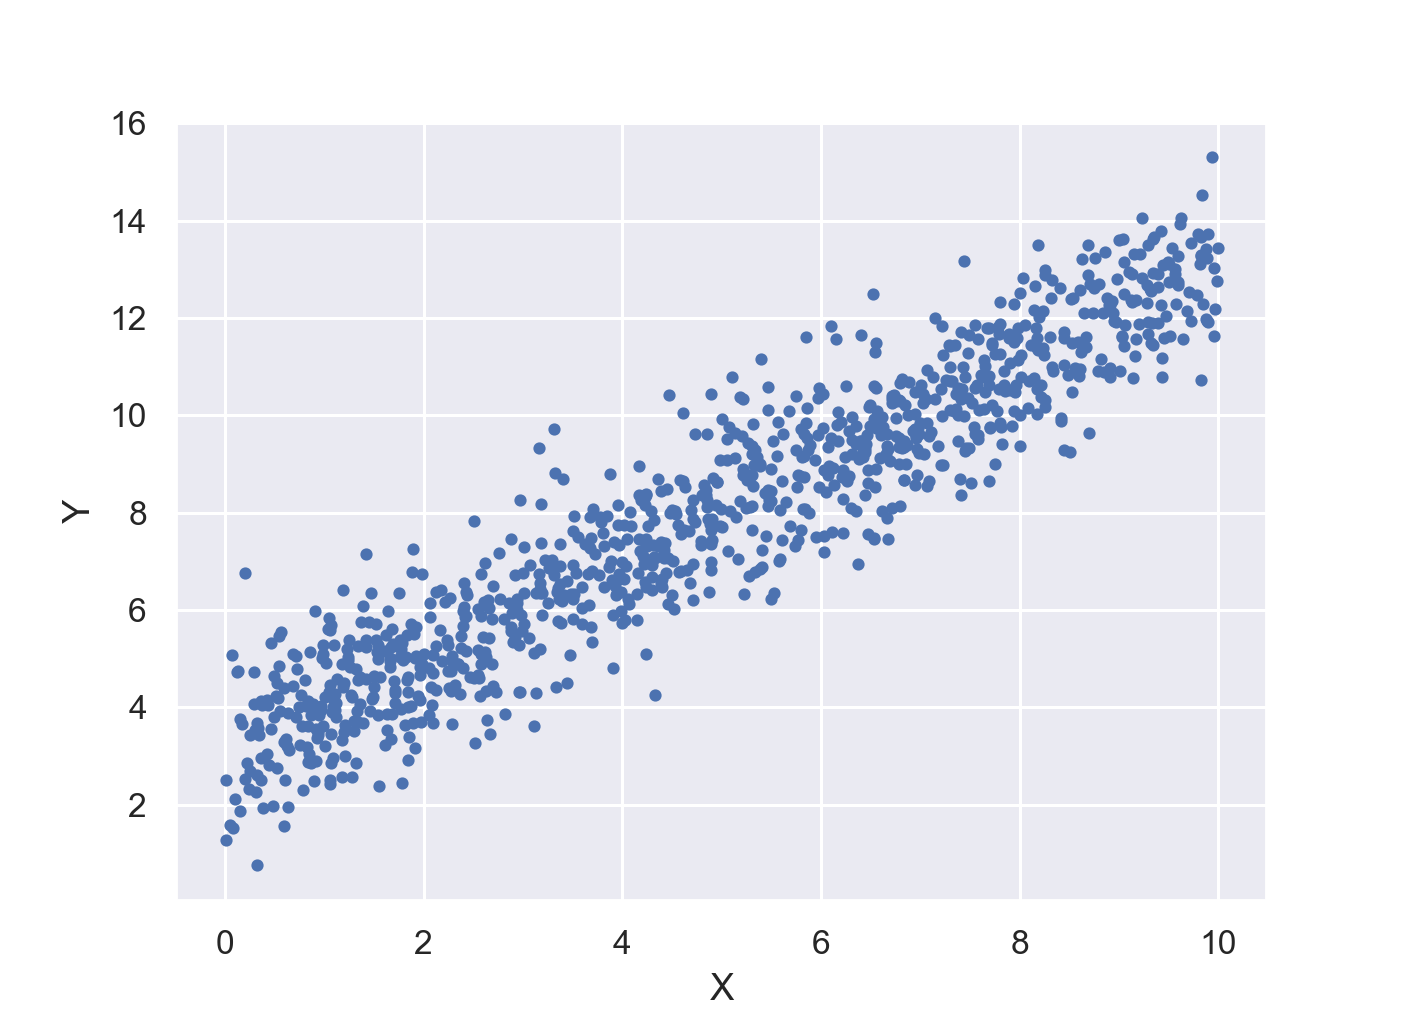

In [7]:
# plot histogram of data.

fig = plt.figure(figsize = (6.4,4.6), dpi = 200)
ax = fig.gca()
ax.plot ( dfxy.x.values
        , dfxy.y.values
        , "."
        )
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()
plt.savefig("xy.png")

In [ ]:
# plot histogram of data.

fig = plt.figure(figsize = (6.4,4.6), dpi = 200)
ax = fig.gca()
ax.plot ( dfxy.x.values
        , dfxy.y.values
        , "."
        )
ax.plot ( dfxy.x.values
        , dfxy.x.values + 3
        , linewidth = 2
        , color = "r"
        )
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()
plt.savefig("xy.png")

In [ ]:
class Normal():

    def __init__(self, normData):
        self.data = normData
        self.ndata = len(self.data)
        self.maxdata = np.max(self.data)

    def getLogProb(self, data, avg, logStd, cutoff):
        """
        Return the logarithm of the probability density of an input set of x values, 
        given the input parameters (avg,logStd,cutoff) for the Gaussian PDF.
        """
        std = np.exp(logStd)
        return - 2.506628274631000 - logStd - 0.5 * ( (data-avg) / std )**2 - np.log(norm.cdf(cutoff, avg, std))

    def getLogLike(self,param):
        if param[2] < self.maxdata:
            # data cannot be larger than the threshold, 
            # so such parameter set for the Gaussian is impossible
            # therefore return negative infinity as the value of the logLikelihood
            return -1.e300
        else:
            return np.sum( self.getLogProb(self.data, param[0], param[1], param[2]) )

normal = Normal(normData = logx)

In [ ]:
pmpd = pm.ParaDRAM() # create a ParaDRAM sampler object
pmpd.spec.chainSize = 20000 # change the number of sampled points from default 100,000 to 30,000
pmpd.spec.variableNameList = ["Average","LogStandardDeviation","Cutoff"]
pmpd.spec.startPointVec = [0,0,normal.maxdata] # ensure the initial starting point of the search for cutoff is good.
pmpd.spec.targetAcceptanceRate = [0.1,0.2]

# call MCMC sampler

pmpd.runSampler( ndim = 3
               , getLogFunc = normal.getLogLike
               )

In [ ]:
# read the resulting sample
pmpd.readSample()

# plot the sampled variables
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.line.ycolumns = colname
    pmpd.sampleList[0].plot.line.outputFile = "traceplot_" + colname
    pmpd.sampleList[0].plot.line()
    pmpd.sampleList[0].plot.line.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.line.currentFig.axes.set_ylabel(colname)



In [ ]:
# plot the histograms of the sampled parameters
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.hist.columns = colname
    pmpd.sampleList[0].plot.hist.outputFile = "histogram_" + colname
    pmpd.sampleList[0].plot.hist()
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_ylabel(colname)


In [ ]:
pmpd.sampleList[0].df.mean()

In [ ]:
np.max(logx)

In [ ]:
norm.cdf(cutoff, avg, std)

In [ ]:
pmpd.sampleList[0].plot.hist.columns